In [1]:
import torch
import math
import matplotlib.pyplot as plt

from PIL import Image
from torchvision import transforms


In [2]:
tensorX = torch.rand(4,3,5,6)
print(tensorX)
print(tensorX.size())
print(tensorX.dim())

tensor([[[[0.7191, 0.2492, 0.9825, 0.8306, 0.3124, 0.2788],
          [0.8589, 0.9926, 0.0010, 0.1570, 0.1533, 0.4238],
          [0.4475, 0.6243, 0.8704, 0.5280, 0.6219, 0.7425],
          [0.4030, 0.9924, 0.4807, 0.6051, 0.0338, 0.2813],
          [0.0483, 0.6831, 0.9527, 0.8835, 0.5294, 0.1272]],

         [[0.4827, 0.2232, 0.8766, 0.3966, 0.8468, 0.2513],
          [0.7515, 0.7129, 0.3200, 0.8901, 0.5205, 0.0733],
          [0.6300, 0.1991, 0.8302, 0.5467, 0.5953, 0.2870],
          [0.5827, 0.0407, 0.5584, 0.2962, 0.5116, 0.6977],
          [0.5438, 0.7131, 0.6089, 0.1015, 0.5261, 0.0946]],

         [[0.2936, 0.0947, 0.6810, 0.3123, 0.3541, 0.9513],
          [0.4705, 0.7226, 0.3902, 0.4507, 0.2212, 0.8703],
          [0.7676, 0.6161, 0.1146, 0.9135, 0.5470, 0.3987],
          [0.0667, 0.5013, 0.6225, 0.9414, 0.5508, 0.0686],
          [0.3133, 0.9771, 0.2863, 0.4571, 0.0492, 0.5850]]],


        [[[0.9517, 0.6101, 0.3414, 0.9919, 0.8562, 0.4086],
          [0.6817, 0.4362, 0.157

tensor([[[0.3076, 0.8082, 0.0619, 0.2407, 0.8853, 0.5676],
         [0.3002, 0.2465, 0.5690, 0.0799, 0.0111, 0.0779],
         [0.7944, 0.3455, 0.9801, 0.7547, 0.6982, 0.0057],
         [0.2676, 0.8987, 0.3114, 0.8633, 0.3422, 0.9308],
         [0.9249, 0.6157, 0.8818, 0.4928, 0.2945, 0.1674]],

        [[0.0424, 0.7092, 0.1120, 0.2532, 0.6587, 0.3505],
         [0.6642, 0.9700, 0.5608, 0.6668, 0.8260, 0.5930],
         [0.5998, 0.9822, 0.8112, 0.9482, 0.5915, 0.2278],
         [0.3506, 0.2835, 0.0804, 0.6764, 0.8492, 0.2987],
         [0.7911, 0.2511, 0.9257, 0.0763, 0.6530, 0.8261]],

        [[0.6015, 0.2796, 0.5867, 0.1014, 0.9082, 0.0643],
         [0.1319, 0.6858, 0.8145, 0.1812, 0.9834, 0.2716],
         [0.0971, 0.4076, 0.4227, 0.1407, 0.4682, 0.5553],
         [0.0956, 0.7935, 0.2728, 0.2582, 0.2845, 0.8630],
         [0.7513, 0.5782, 0.2815, 0.6894, 0.4411, 0.5569]]])


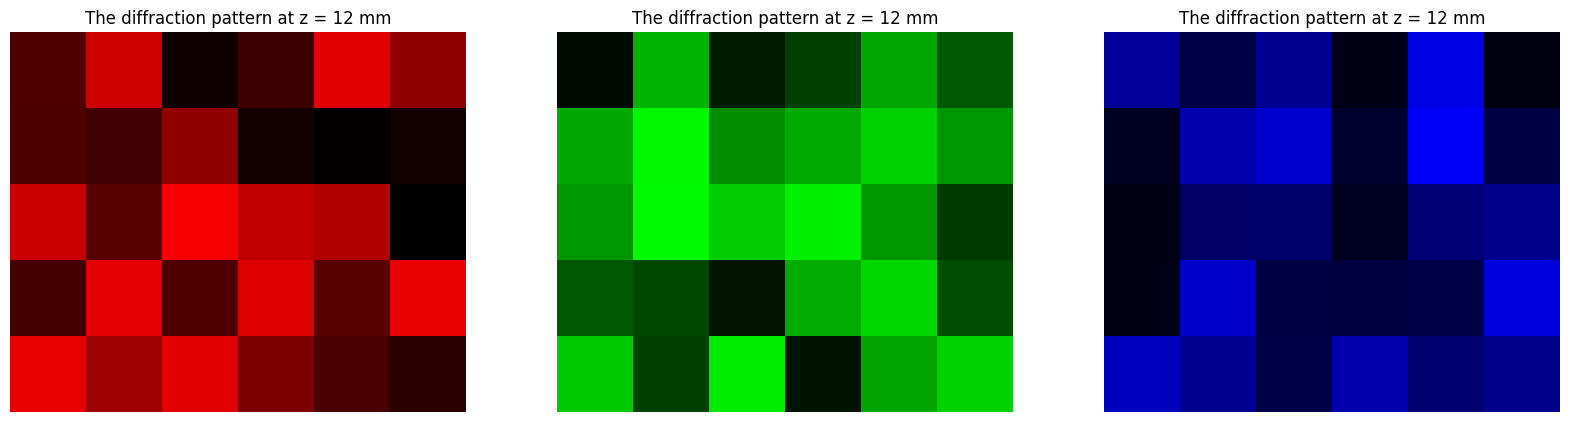

In [9]:
import torch
import utilities
tensorX = torch.rand(3,5,6)
print(tensorX)
utilities.diffraction_plotter(tensorX, 12, False, 0)


In [9]:
freq = torch.fft.fftfreq(9, 1/9)
freq_with_fftshift = torch.fft.fftshift(freq)
freq_with_ifftshift = torch.fft.ifftshift(freq)
print(freq)
print(freq_with_fftshift)
print(freq_with_ifftshift)

tensor([ 0.,  1.,  2.,  3.,  4., -4., -3., -2., -1.])
tensor([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])
tensor([ 4., -4., -3., -2., -1.,  0.,  1.,  2.,  3.])


In [14]:
import torch

field_padded = torch.rand(1920,1080).to('cuda')
H =torch.rand(1920,1080).to('cuda')
aperture = torch.rand(1920,1080).to('cuda')


# original code
U1_1 = torch.fft.fftshift(torch.fft.fft2(torch.fft.fftshift(field_padded)))
U2_1 = H * aperture * U1_1
result_1 = torch.fft.ifftshift(torch.fft.ifft2(torch.fft.ifftshift(U2_1)))


# remove the fftshift and ifftshift in the spatial domain
U1_2 = torch.fft.fftshift(torch.fft.fft2(field_padded))
U2_2 = H * aperture * U1_2
result_2 = torch.fft.ifft2(torch.fft.ifftshift(U2_2))

assert torch.allclose(result_1, result_2, atol=1e-6)

In [2]:
import time
import torch

def cpu_timer(operation,reapeat=100):
    total_time = 0
    for _ in range(reapeat):
        start_time = time.perf_counter()
        operation()
        end_time = time.perf_counter()
        total_time += end_time - start_time
    return total_time/reapeat

def gpu_timer(operation,reapeat=100):
    total_time = 0
    # clean the cache on gpu
    torch.cuda.empty_cache()
    for _ in range(reapeat):
        torch.cuda.synchronize()
        start_time = torch.cuda.Event(enable_timing=True)
        end_time = torch.cuda.Event(enable_timing=True)
        
        start_time.record()
        operation()
        end_time.record()
        
        torch.cuda.synchronize()
        total_time += start_time.elapsed_time(end_time)
    return total_time/reapeat

def original_code(field_padded, H, aperture):
    U1 = torch.fft.fftshift(torch.fft.fft2(torch.fft.fftshift(field_padded)))
    U2 = H * aperture * U1
    return torch.fft.ifftshift(torch.fft.ifft2(torch.fft.ifftshift(U2)))

def modified_code(field_padded, H, aperture):
    U1 = torch.fft.fftshift(torch.fft.fft2(field_padded))
    U2 = H * aperture * U1
    return torch.fft.ifft2(torch.fft.ifftshift(U2))

# comparison on cpu
field_padded = torch.rand(1920,1080)
H =torch.rand(1920,1080)
aperture = torch.rand(1920,1080)

original_time = cpu_timer(lambda: original_code(field_padded, H, aperture))
modified_time = cpu_timer(lambda: modified_code(field_padded, H, aperture))
print(f'Original code on CPU: {original_time:.8f} ms')
print(f'Modified code on CPU: {modified_time:.8f} ms')

# check if the results are the same
assert torch.allclose(original_code(field_padded, H, aperture), modified_code(field_padded, H, aperture), atol=1e-6)

# comparison on gpu
field_padded = field_padded.to('cuda')
H = H.to('cuda')
aperture = aperture.to('cuda')

original_time = gpu_timer(lambda: original_code(field_padded, H, aperture))
modified_time = gpu_timer(lambda: modified_code(field_padded, H, aperture))
print(f'Original code on GPU: {original_time:.8f} ms')
print(f'Modified code on GPU: {modified_time:.8f} ms')

# check if the results are the same
assert torch.allclose(original_code(field_padded, H, aperture), modified_code(field_padded, H, aperture), atol=1e-6)

Original code on CPU: 0.03265293 ms
Modified code on CPU: 0.02521489 ms
Original code on GPU: 8.60004100 ms
Modified code on GPU: 5.47566400 ms


In [17]:
%timeit
# original code
U1_1 = torch.fft.fftshift(torch.fft.fft2(torch.fft.fftshift(field_padded)))
U2_1 = H * aperture * U1_1
result_1 = torch.fft.ifftshift(torch.fft.ifft2(torch.fft.ifftshift(U2_1)))

# print the time
%timeit torch.fft.fftshift(torch.fft.fft2(torch.fft.fftshift(field_padded)))
%timeit torch.fft.fftshift(torch.fft.fft2(field_padded))

2.45 ms ± 152 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.35 ms ± 49.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


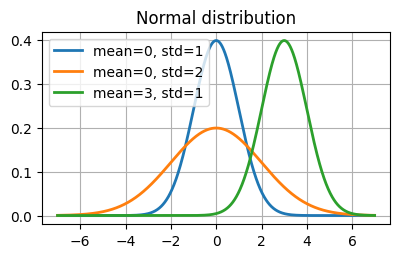

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math


def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu) ** 2 / sigma**2)


# Use NumPy again for visualization
x = np.arange(-7, 7, 0.01)

# Mean and standard deviation pairs
params = [(0, 1), (0, 2), (3, 1)]
plt.figure(figsize=(4.5, 2.5))
plt.plot(x,normal(x, *params[0]), linewidth=2, label='mean=0, std=1')
plt.plot(x,normal(x, *params[1]), linewidth=2, label='mean=0, std=2')
plt.plot(x,normal(x, *params[2]), linewidth=2, label='mean=3, std=1')
plt.legend()
plt.title('Normal distribution')
plt.grid()
plt.show()

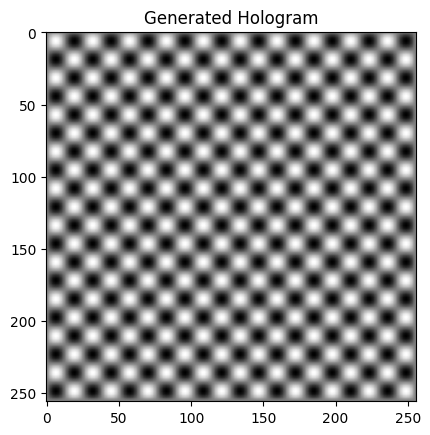

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一个简单的二维全息图（正弦波干涉图样）
def generate_hologram(size, frequency):
    x = np.linspace(-np.pi, np.pi, size)
    y = np.linspace(-np.pi, np.pi, size)
    X, Y = np.meshgrid(x, y)
    hologram = np.sin(frequency * X) * np.sin(frequency * Y)
    return hologram

size = 256
frequency = 10
hologram = generate_hologram(size, frequency)

plt.imshow(hologram, cmap='gray')
plt.title("Generated Hologram")
plt.show()


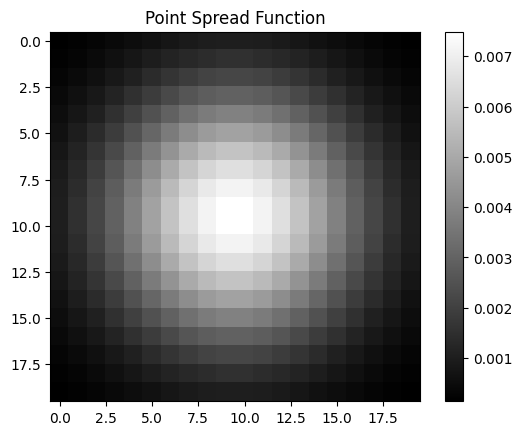

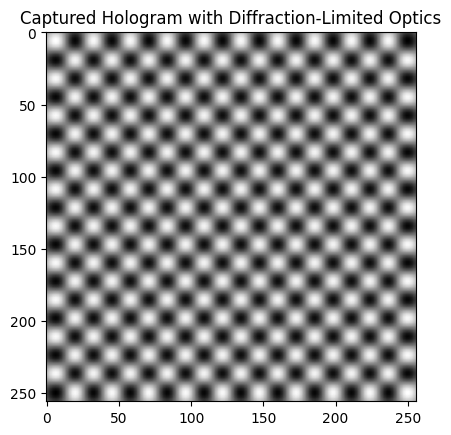

In [11]:
from scipy.signal import convolve2d

# 生成理想的点扩散函数（高斯函数模拟）
def gaussian_psf(size, sigma):
    x = np.linspace(-size // 2, size // 2, size)
    y = np.linspace(-size // 2, size // 2, size)
    X, Y = np.meshgrid(x, y)
    psf = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    psf /= np.sum(psf)
    return psf

psf_size = 20
sigma = 5  # 模拟数值孔径和波长的影响
psf = gaussian_psf(psf_size, sigma)

# plot the point spread function
plt.imshow(psf, cmap='gray')
plt.title("Point Spread Function")
plt.colorbar()
plt.show()

# 模拟相机对全息图的拍摄过程（卷积操作）
captured_hologram = convolve2d(hologram, psf, mode='same')

plt.imshow(captured_hologram, cmap='gray')
plt.title("Captured Hologram with Diffraction-Limited Optics")
plt.show()


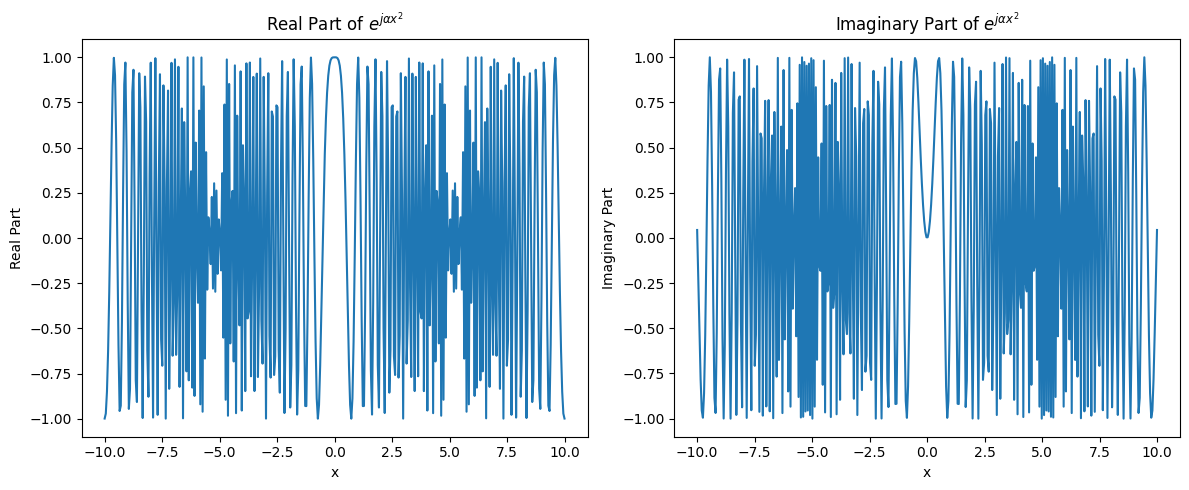

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 定义参数
alpha = 6.0
x = np.linspace(-10, 10, 400)

# 计算二次相位指数函数
quadratic_phase = np.exp(1j * alpha * x**2)

# 分别绘制实部和虚部
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, np.real(quadratic_phase))
plt.title('Real Part of $e^{j \\alpha x^2}$')
plt.xlabel('x')
plt.ylabel('Real Part')

plt.subplot(1, 2, 2)
plt.plot(x, np.imag(quadratic_phase))
plt.title('Imaginary Part of $e^{j \\alpha x^2}$')
plt.xlabel('x')
plt.ylabel('Imaginary Part')

plt.tight_layout()
plt.show()


In [3]:
def num_gpus():  #@save
    """Get the number of available GPUs."""
    return torch.cuda.device_count()

num_gpus()

1

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

print(torch.cuda.is_available())

# 检查是否有 GPU 可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 生成一些示例数据
x_train = torch.randn(100, 10)
y_train = torch.randn(100, 1)

# 创建数据集和数据加载器
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# 定义一个简单的神经网络模型
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 50)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(50, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# 实例化模型并移动到 GPU
model = SimpleNN().to(device)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练模型
num_epochs = 20
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        # 将数据移动到 GPU
        inputs, targets = inputs.to(device), targets.to(device)
        
        # 前向传播
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


True
Epoch [1/20], Loss: 0.6930
Epoch [2/20], Loss: 0.7139
Epoch [3/20], Loss: 0.6595
Epoch [4/20], Loss: 0.5928
Epoch [5/20], Loss: 0.7514
Epoch [6/20], Loss: 0.7275
Epoch [7/20], Loss: 1.1080
Epoch [8/20], Loss: 0.6986
Epoch [9/20], Loss: 0.8675
Epoch [10/20], Loss: 1.3716
Epoch [11/20], Loss: 1.7587
Epoch [12/20], Loss: 0.0790
Epoch [13/20], Loss: 1.4774
Epoch [14/20], Loss: 0.2219
Epoch [15/20], Loss: 0.5333
Epoch [16/20], Loss: 0.3532
Epoch [17/20], Loss: 0.4076
Epoch [18/20], Loss: 1.4228
Epoch [19/20], Loss: 0.4489
Epoch [20/20], Loss: 0.6263


In [21]:
def angular_spectrum(
    source_plain=-1,
    amplitude_plain=-1,
    phase_plain=-1,
    wave_length=1,
    pixel_pitch = 3.74e-6,
    z=100 * 2048, # the propagation distance
    sample_u=1024,  # the number of pixels in x-axis
    sample_v=1024,  # the number of pixels in y-axis
    clipper_u=-1,
    clipper_v=-1,
):
    dx = 2 * pixel_pitch  # the sample interval

    N_u = 2 * sample_u
    N_v = 2 * sample_v


    # generate the 2-D frequency mesh
    freq_x = torch.fft.fftfreq(N_u, dx)
    freq_y = torch.fft.fftfreq(N_v, dx)

    freq_x = torch.unsqueeze(freq_x, dim=1).expand(
        -1, len(freq_y)
    )  # expand to len(y) columns
    freq_y = torch.unsqueeze(freq_y, dim=0).expand(
        len(freq_x), -1
    )  # expand to len(x) rows
    freq_square = freq_x**2 + freq_y**2

    freq_squre_max = torch.full((N_u, N_v), 1 / wave_length) ** 2
    w_square_0 = freq_squre_max - freq_square
    mask = w_square_0 > 0
    w_square = torch.where(mask, w_square_0, 0)

    # transfer function
    H_FR = torch.empty((N_u, N_v), dtype=torch.complex64)
    H_FR = torch.exp(2j * math.pi * z * torch.sqrt(w_square))

    # generate the source plain
    g_0 = torch.zeros((N_u, N_v))
    if isinstance(source_plain, torch.Tensor):
        # load the picture
        g_0[
            N_u // 2 - sample_u // 2 : N_u // 2 + sample_u // 2,
            N_v // 2 - sample_v // 2 : N_v // 2 + sample_v // 2,
        ] = source_plain
        G_0 = torch.fft.fft2(g_0)
    elif (isinstance(amplitude_plain, torch.Tensor) & isinstance(phase_plain, torch.Tensor)):
        G_0 = amplitude_plain*torch.exp(1j*phase_plain) # generate the source plain in frequency domain
    else:
        print("Error: invalid input")
        return

    # the spectrum in the destination plain
    G_z = G_0 * H_FR


    G_z = torch.fft.fftshift(G_z)
    # clip the frequency in x
    if clipper_u == -1:
        pass
    else:
        G_z[: N_u // 2 + 1 - clipper_u, :] = 0
        G_z[N_u // 2 + clipper_u :, :] = 0

    # clip the frequency in y
    if clipper_v == -1:
        pass
    else:
        G_z[:, : N_v // 2 + 1 - clipper_v] = 0
        G_z[:, N_v // 2 + clipper_v :] = 0

    G_z = torch.fft.ifftshift(G_z)


    # 目标平面
    g_z = torch.fft.ifft2(G_z).abs()

    return (
        H_FR.real,
        g_z[
            int(N_u / 2) - sample_u // 2 : int(N_u / 2) + sample_u // 2,
            int(N_v / 2) - sample_v // 2 : int(N_v / 2) + sample_v // 2,
        ],
    )

In [22]:
def band_limited_angular_spectrum(
    source_plain=-1,
    amplitude_plain=-1,
    phase_plain=-1,
    wave_length=1,
    pixel_pitch=3.74e-6,
    z=100 * 2048,
    sample_u=1024,
    sample_v=1024,
):
    dx = 2 * pixel_pitch  # the sampling interval
    S_x = sample_u * dx
    S_y = sample_v * dx

    N_u = 2 * sample_u
    N_v = 2 * sample_v

    freq_u = torch.fft.fftfreq(N_u, dx)
    freq_u = torch.fft.fftshift(freq_u)

    freq_v = torch.fft.fftfreq(N_v, dx)
    freq_v = torch.fft.fftshift(freq_v)

    d_u = 1 / (2 * S_x)
    d_v = 1 / (2 * S_y)
    u_limit = 1 / (math.sqrt((2 * d_u * z) ** 2 + 1) * wave_length)
    v_limit = 1 / (math.sqrt((2 * d_v * z) ** 2 + 1) * wave_length)

    mask_u = abs(freq_u) <= (u_limit)
    if torch.all(mask_u):
        clipper_u = -1
        max_frequency_retained_u = abs(freq_u[0])
    else:
        first_true_index = torch.argmax(mask_u.to(torch.int))
        clipper_u = N_u // 2 + 1 - first_true_index
        max_frequency_retained_u = abs(freq_u[first_true_index])

    mask_v = abs(freq_v) <= (v_limit)
    if torch.all(mask_v):
        clipper_v = -1
        max_frequency_retained_v = abs(freq_v[0])
    else:
        first_true_index = torch.argmax(mask_v.to(torch.int))
        clipper_v = N_v // 2 + 1 - first_true_index
        max_frequency_retained_v = abs(freq_v[first_true_index])

    H_FR_real, g_z = angular_spectrum(source_plain,amplitude_plain, phase_plain, wave_length, pixel_pitch, z, sample_u, sample_v, clipper_u, clipper_v)

    print(
        f"u: cut-off frequency {(u_limit)} : set clipper_n to be {clipper_u} (the max frequency retained : {max_frequency_retained_u})\n",
        f"v: cut-off frequency {(v_limit)} : set clipper_n to be {clipper_v} (the max frequency retained : {max_frequency_retained_v})\n",
    )

    return max_frequency_retained_u, max_frequency_retained_v, g_z

In [30]:
def phase_image2phase_tensor(image_path):
    image_grey = Image.open(image_path).convert("L") # convert the image to gray scale
    print(image_grey.size)
    transform = transforms.ToTensor()
    image_tensor = transform(image_grey)
    print(image_tensor.shape)
    image_tensor = image_tensor.squeeze(0) # delete a dimension from the tensor
    image_tensor_normalized = image_tensor * 2 * math.pi
    return image_tensor_normalized # return the tensor between 0 and 2*pi
    
phaseTensor = phase_image2phase_tensor("sample_hologram.png")
phaseTensor.shape

(4094, 2400)
torch.Size([1, 2400, 4094])


torch.Size([2400, 4094])

In [31]:
def amplitude_tensor(image_path):
    image_shape = Image.open(image_path).size
    # generate 2-D amplitude tensor same size as the phase tensor all values are 1.0
    amplitude_tensor = torch.ones(image_shape)
    return amplitude_tensor.T
amplitudeTensor = amplitude_tensor("sample_hologram.png")
amplitudeTensor.shape

torch.Size([2400, 4094])

In [36]:
max_frequency_retained_u, max_frequency_retained_v, g_z = band_limited_angular_spectrum(
    source_plain=-1,
    amplitude_plain=amplitude_tensor("sample_hologram.png"),
    phase_plain=phase_image2phase_tensor("sample_hologram.png"),
    wave_length=639e-9,
    pixel_pitch=3.74e-6,
    z=2.5e-3,
    sample_u=2400 // 2,
    sample_v=4094 // 2,
)

(4094, 2400)
torch.Size([1, 2400, 4094])
u: cut-off frequency 1507563.6476508474 : set clipper_n to be -1 (the max frequency retained : 66844.921875)
 v: cut-off frequency 1544493.4391567956 : set clipper_n to be -1 (the max frequency retained : 66844.921875)



(4094, 2400)
torch.Size([1, 2400, 4094])
u: cut-off frequency 1507563.6476508474 : set clipper_n to be -1 (the max frequency retained : 66844.921875)
 v: cut-off frequency 1544493.4391567956 : set clipper_n to be -1 (the max frequency retained : 66844.921875)



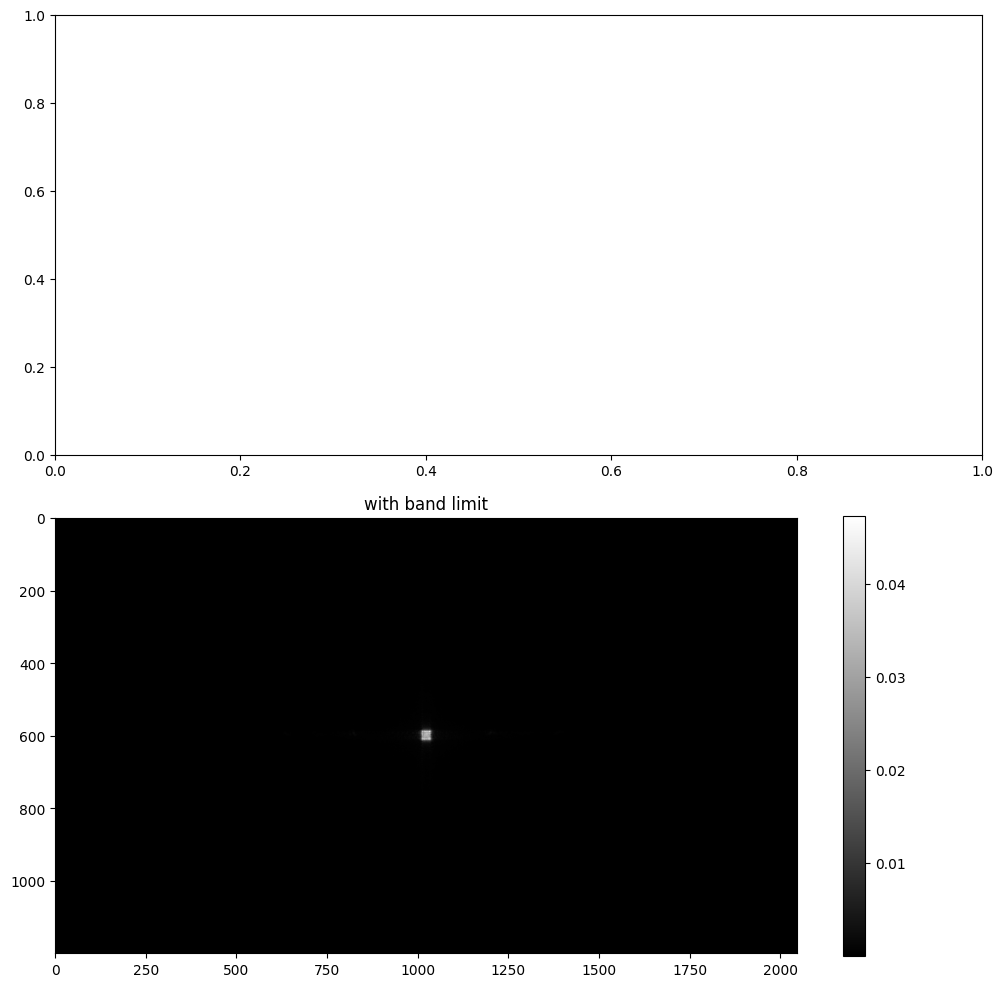

In [37]:
u, v, band_limited_g_z_2D = band_limited_angular_spectrum(
    source_plain=-1,
    amplitude_plain=amplitude_tensor("sample_hologram.png"),
    phase_plain=phase_image2phase_tensor("sample_hologram.png"),
    wave_length=639e-9,
    pixel_pitch=3.74e-6,
    z=2.5e-3,
    sample_u=2400 // 2,
    sample_v=4094 // 2,
)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# im1 = axes[0].imshow(g_z_2D, cmap="gray")
# fig.colorbar(im1, ax=axes[0])
# axes[0].set_title("original method")

im2 = axes[1].imshow(band_limited_g_z_2D, cmap="gray")
fig.colorbar(im2, ax=axes[1])
axes[1].set_title("with band limit")

plt.tight_layout()
plt.show()